## Importing Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import missingno as msno
import dtale
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import SCORERS
from numpy import mean, std
from numpy import math
import pickle

from sklearn.model_selection import GridSearchCV
from math import sin, cos, sqrt, atan2, radians
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error

# EagleBine 

In [ ]:
df=pd.read_csv('egbCombinedLog_ft.csv')
df.drop(columns =['Elevation_Reference', 'TD','diff_depth_abs','TrueTemp_datasource', 'Total Vertical Depth (ft)   '],inplace=True)

df.drop(columns =[ 'Water Maximum (bbl)   ','SurfaceLatitude_NAD83','SurfaceLongitude_NAD83', 'BottomLatitude_NAD83', 'BottomLongitude_NAD83', 'SurfaceLatitude_NAD27',
       'SurfaceLongitude_NAD27', 'BottomLatitude_NAD27','BottomLongitude_NAD27'],inplace=True)
df.drop(columns =[ 'mud_diff_depth', 'mud_diff_depth_abs', 'Water Total Cum (bbl)   ',
       'GOR Total Average   ','Total_Depth(f)','01_Wilcox_MD_ft', '02_Midway_MD_ft',
       '03_Navarro_MD_ft', '04_Taylor_MD_ft','09_Woodbine_MD_ft', '10_Maness_MD_ft','14_Edwards_MD_ft', '15_Glen_Rose_MD_ft', '16_Pearsal_MD_ft',
       '17_James_Cow_Creek_MD_ft', '18_Sligo_MD_ft', '19_Cotton_Valley_MD_ft','td','07_Upper_Eagle_Ford_MD_ft'],inplace=True)
df.drop(columns =[ 'mud depth','X(f)', 'Y(f)','Bottom_Hole_Location_X','Bottom_Hole_Location_Y','KB','SurfLat', 'SurfLong','Elevation'],inplace=True)
df.drop(columns =[ 'den','sonic'],inplace=True)
df['Mud Wt'].fillna((df['Mud Wt'].median()), inplace=True)
df['Oil Total Cum (bbl)   '].fillna(0, inplace=True)
df['Gas Total Cum (mcf)   '].fillna(0, inplace=True)
df['Oil Maximum (bbl)   '].fillna(0, inplace=True)
df['Gas Maximum (mcf)   '].fillna(0, inplace=True)
df['Production_interval(years)'].fillna(0, inplace=True)
df['MinCasingSize\\'].fillna((df['MinCasingSize\\'].median()), inplace=True)
df['MW@Depth(KB)'].fillna((df['MW@Depth(KB)'].median()), inplace=True)
df.isna().sum()

UWI                            0
TD (ft)                        0
GL(ft)                         0
BHT_below sea level (ft)       0
BHT_ subsurface (ft)           0
TSC(hrs)                       0
TempC_BHT                      0
Target                        81
Mud Wt                         0
MW@Depth(KB)                   0
Production_interval(years)     0
Oil Total Cum (bbl)            0
Gas Total Cum (mcf)            0
Gas Maximum (mcf)              0
Oil Maximum (bbl)              0
MinCasingSize\                 0
Elevation(f)                   0
Latitude                       0
Longitude                      0
05_Anacacho_MD_ft              0
06_Austin_Chalk_MD_ft          0
08_Lower_Eagle_Ford_MD_ft      0
11_Buda_MD_ft                  0
12_Del_Rio_MD_ft               0
13_Georgetown_MD_ft            0
Set                            2
gr                            13
sp                             9
porDen                        92
porNeu                        72
resDP     

In [ ]:
df.columns

Index(['UWI', 'TD (ft)', 'GL(ft)', 'BHT_below sea level (ft)',
       'BHT_ subsurface (ft)', 'TSC(hrs)', 'TempC_BHT', 'Target', 'Mud Wt',
       'MW@Depth(KB)', 'Production_interval(years)', 'Oil Total Cum (bbl)   ',
       'Gas Total Cum (mcf)   ', 'Gas Maximum (mcf)   ',
       'Oil Maximum (bbl)   ', 'MinCasingSize\', 'Elevation(f)', 'Latitude',
       'Longitude', '05_Anacacho_MD_ft', '06_Austin_Chalk_MD_ft',
       '08_Lower_Eagle_Ford_MD_ft', '11_Buda_MD_ft', '12_Del_Rio_MD_ft',
       '13_Georgetown_MD_ft', 'Set', 'gr', 'sp', 'porDen', 'porNeu', 'resDP',
       'resMD', 'resSH'],
      dtype='object')

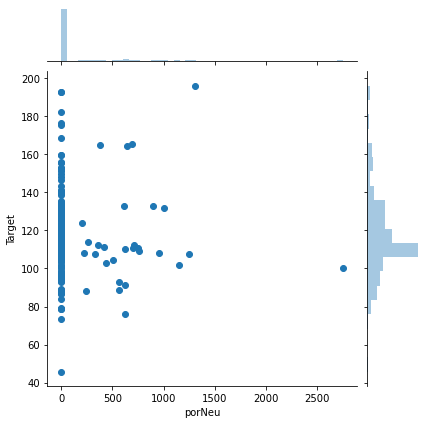

In [ ]:

sns.jointplot(x='porNeu',y='Target',data=df,kind='scatter')

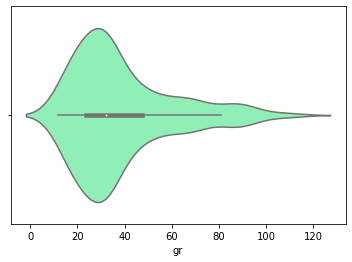

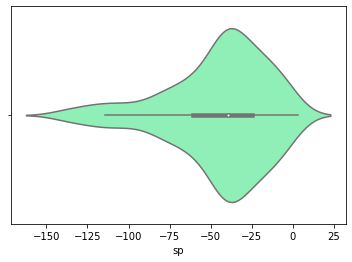

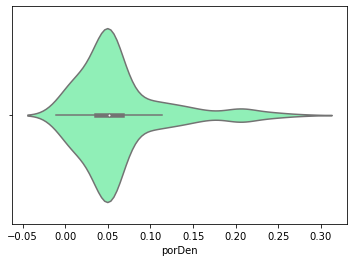

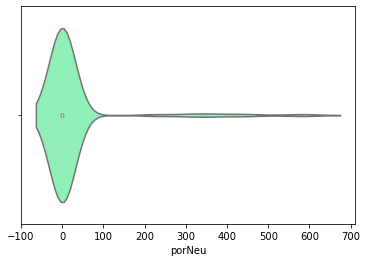

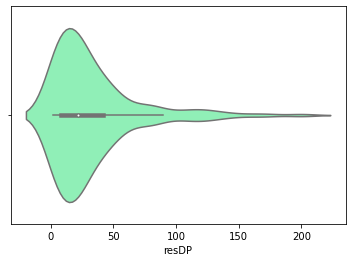

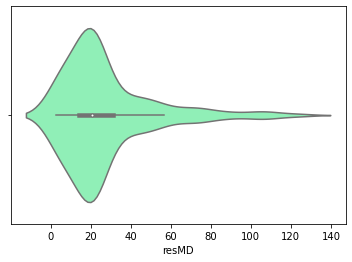

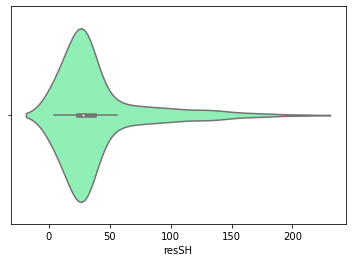

In [ ]:
col=['gr', 'sp', 'porDen','porNeu', 'resDP', 'resMD', 'resSH']
for log in col:
    log95=np.percentile(df[log], 95)
    log5=np.percentile(df[log], 5)
    df[log] = df[log].apply(lambda x: np.nan if (x > log95) or (x < log5) else x)
    a=df[log].median()
    df[log].fillna(a,inplace=True)
    plt.figure()
    sns.violinplot(df[log],palette='rainbow')
    plt.show()

In [ ]:
df.isin([0]).sum()


UWI                            0
TD (ft)                        0
GL(ft)                         0
BHT_below sea level (ft)       0
BHT_ subsurface (ft)           0
TSC(hrs)                      39
TempC_BHT                      0
Target                         0
Mud Wt                         0
MW@Depth(KB)                   0
Production_interval(years)    80
Oil Total Cum (bbl)           79
Gas Total Cum (mcf)           73
Gas Maximum (mcf)             79
Oil Maximum (bbl)             85
MinCasingSize\                 0
Elevation(f)                   0
Latitude                       0
Longitude                      0
05_Anacacho_MD_ft             30
06_Austin_Chalk_MD_ft          7
08_Lower_Eagle_Ford_MD_ft     17
11_Buda_MD_ft                  0
12_Del_Rio_MD_ft              35
13_Georgetown_MD_ft           66
Set                            0
gr                             0
sp                             0
porDen                         0
porNeu                         0
resDP     

In [ ]:

collog=['porNeu', 'resDP', 'resMD', 'resSH']
for log in collog:
    df[log]=np.log10(df[log])
    

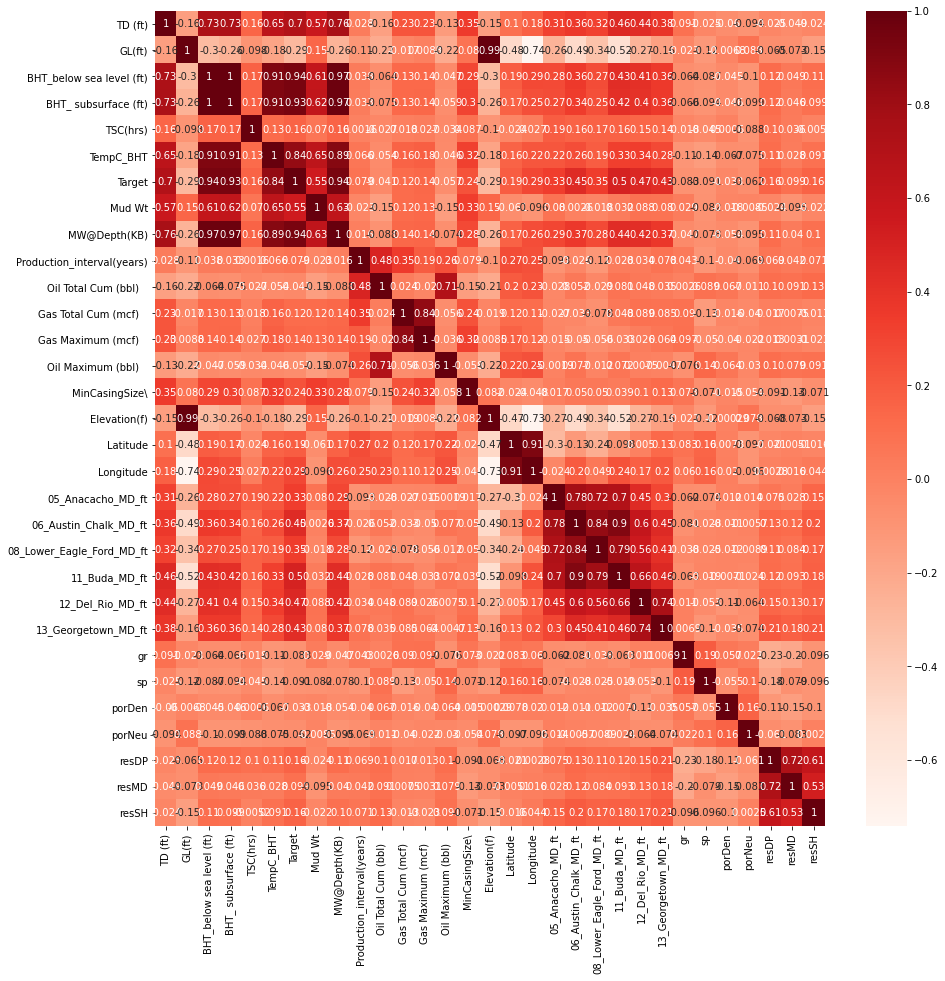

In [ ]:
cor = df.drop(columns =['UWI','Set']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

## Eaglebine feature importance

C:\Users\mahta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Feature TD (ft): 238.069794
Feature GL(ft): 22.441539
Feature BHT_below sea level (ft): 1708.919289
Feature BHT_ subsurface (ft): 1650.161365
Feature TSC(hrs): 6.504974
Feature TempC_BHT: 594.083040
Feature Mud Wt: 103.786782
Feature MW@Depth(KB): 1751.302494
Feature Production_interval(years): 1.526139
Feature Oil Total Cum (bbl)   : 0.398476
Feature Gas Total Cum (mcf)   : 3.414357
Feature Gas Maximum (mcf)   : 4.962538
Feature Oil Maximum (bbl)   : 0.778693
Feature MinCasingSize\: 14.958850
Feature Elevation(f): 22.550286
Feature Latitude: 8.795882
Feature Longitude: 22.426769
Feature 05_Anacacho_MD_ft: 30.200708
Feature 06_Austin_Chalk_MD_ft: 59.668128
Feature 08_Lower_Eagle_Ford_MD_ft: 32.647599
Feature 11_Buda_MD_ft: 80.046714
Feature 12_Del_Rio_MD_ft: 66.515125
Feature 13_Georgetown_MD_ft: 55.215057
Feature gr: 1.685249
Feature sp: 2.030752
Feature porDen: 0.261112
Feature porNeu: 0.933696
Feature resDP: 6.580314
Feature resMD: 2.401000
Feature resSH: 6.420762


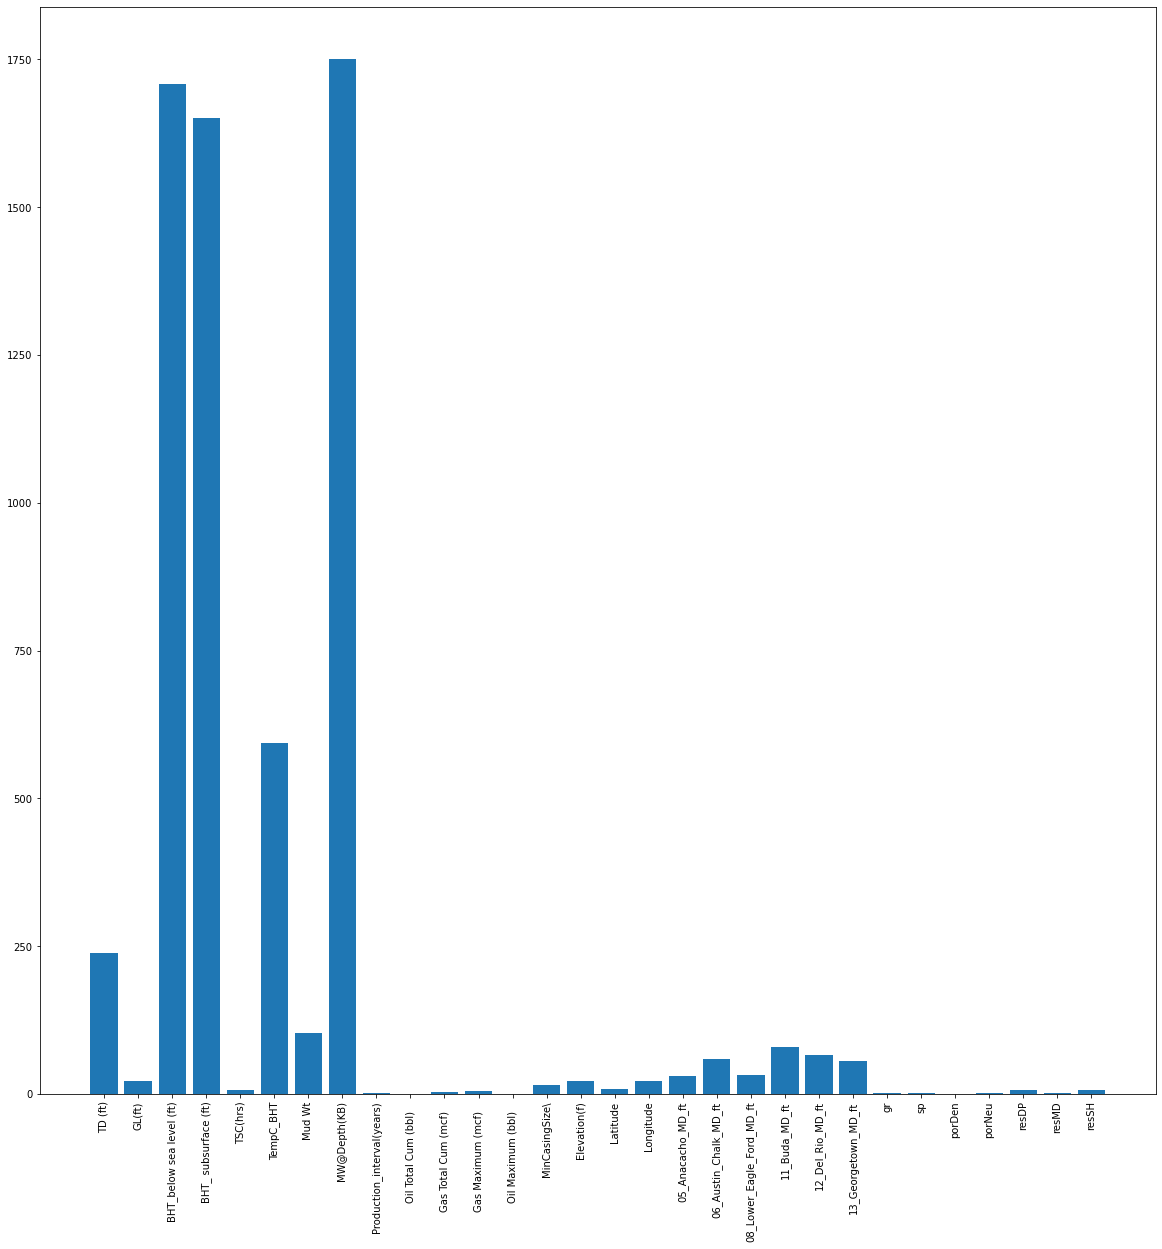

In [ ]:
df_train=df[df['Set']=='Training']
df_train.dropna(subset=['Target'],inplace=True)
#df_train = df_train.fillna(df_train.median())

y=df_train['Target']
x=df_train.drop(columns =['Target','Set','UWI'])
from sklearn.feature_selection import SelectKBest, chi2, f_regression
fs=SelectKBest(score_func=f_regression,k=5)
fs.fit(x,y)
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x.columns[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize=(20,20))
plt.bar([x.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(rotation=90)
plt.show()

## EagleBine data standardization

In [ ]:

scaler = StandardScaler()
data=df[[ 'TD (ft)', 'GL(ft)', 'BHT_below sea level (ft)',
       'BHT_ subsurface (ft)', 'TSC(hrs)', 'TempC_BHT', 'Mud Wt',
       'MW@Depth(KB)', 'Production_interval(years)', 'Oil Total Cum (bbl)   ',
       'Gas Total Cum (mcf)   ', 'Gas Maximum (mcf)   ',
       'Oil Maximum (bbl)   ', 'MinCasingSize\\', 'Elevation(f)', 'Latitude',
       'Longitude', '05_Anacacho_MD_ft', '06_Austin_Chalk_MD_ft',
       '08_Lower_Eagle_Ford_MD_ft', '11_Buda_MD_ft', '12_Del_Rio_MD_ft',
       '13_Georgetown_MD_ft', 'gr', 'sp', 'porDen', 'porNeu', 'resDP',
       'resMD', 'resSH' ]].values
scaler.fit(data)
data_scaled=scaler.transform(data)
scaled=pd.DataFrame(data_scaled,columns=[ 'TD (ft)', 'GL(ft)', 'BHT_below sea level (ft)',
       'BHT_ subsurface (ft)', 'TSC(hrs)', 'TempC_BHT', 'Mud Wt',
       'MW@Depth(KB)', 'Production_interval(years)', 'Oil Total Cum (bbl)   ',
       'Gas Total Cum (mcf)   ', 'Gas Maximum (mcf)   ',
       'Oil Maximum (bbl)   ', 'MinCasingSize\\', 'Elevation(f)', 'Latitude',
       'Longitude', '05_Anacacho_MD_ft', '06_Austin_Chalk_MD_ft',
       '08_Lower_Eagle_Ford_MD_ft', '11_Buda_MD_ft', '12_Del_Rio_MD_ft',
       '13_Georgetown_MD_ft', 'gr', 'sp', 'porDen', 'porNeu', 'resDP',
       'resMD', 'resSH' ])
scaled['UWI']=df['UWI']
scaled['Set']=df['Set']

scaled['Target']=df['Target']
scaled['bias']=1
scaled.head()

,TD (ft),GL(ft),BHT_below sea level (ft),BHT_ subsurface (ft),TSC(hrs),TempC_BHT,Mud Wt,MW@Depth(KB),Production_interval(years),Oil Total Cum (bbl),Gas Total Cum (mcf),Gas Maximum (mcf),Oil Maximum (bbl),MinCasingSize\,Elevation(f),Latitude,Longitude,05_Anacacho_MD_ft,06_Austin_Chalk_MD_ft,08_Lower_Eagle_Ford_MD_ft,11_Buda_MD_ft,12_Del_Rio_MD_ft,13_Georgetown_MD_ft,gr,sp,porDen,porNeu,resDP,resMD,resSH,UWI,Set,Target,bias
0,-1.917308,2.640483,-1.936024,-1.833424,-0.331389,-1.708932,0.221001,-1.881252,-0.900565,-0.550645,-0.316477,-0.292033,-0.598897,0.460952,2.640812,-0.908988,-1.714754,-1.192872,-1.702843,-1.395538,-2.004900,-1.104493,-0.731831,-0.693756,-0.890770,3.365113,0.215767,-1.882118,-2.240973,-1.949300,42507326870000,Training,78.888889,1
1,-0.854625,3.035564,-0.805090,-0.667689,0.266940,-1.053858,-0.508539,-0.697632,-0.900565,-0.550645,-0.316477,-0.292033,-0.598897,-0.505946,2.427832,-0.833370,-2.046703,-1.591250,-2.148531,-1.623128,-2.285026,-1.296867,-0.902890,0.442866,0.601656,2.913444,0.407157,0.082961,0.057504,0.011464,42507312960000,Training,94.794444,1
2,0.125721,1.673123,-1.931916,-1.876558,-0.451055,-1.539881,-0.216723,-1.925048,-0.831162,-0.550645,-0.313351,-0.260345,-0.598897,-0.803453,1.674795,-1.172512,-2.102910,-2.044282,-1.325574,-0.857965,-1.278352,-0.589745,-0.243522,-0.310484,0.883563,-0.228480,-0.148442,-1.110257,0.057504,-0.968951,42507312420000,Validation_Testing,NaN,1
3,2.144652,2.476975,-1.566450,-1.466784,-0.331389,-1.117252,-0.216723,-1.508987,-0.900565,-0.550645,-0.316477,-0.292033,-0.598897,-0.505946,2.481077,-1.139637,-1.695637,-0.287028,-0.594368,-0.337414,-0.664176,-0.183493,0.073667,-0.310484,0.653967,-0.228480,-0.148442,-1.659835,0.057504,-2.365583,42507007550000,Training,78.161111,1
4,-1.122722,0.355173,-0.954956,-0.950663,-0.092058,-0.821412,-0.107292,-0.984948,-0.900565,-0.550645,-0.316477,-0.292033,-0.598897,-0.505946,0.511011,-0.849961,-0.626356,-0.093426,-0.446260,-0.399992,-0.775779,-2.190662,-1.699950,-0.789851,-0.041212,3.357585,0.505874,-1.955366,0.057504,0.011464,42493322270000,Validation_Testing,NaN,1


In [ ]:
scaled_withT=scaled[scaled['Target'].notna()]
#Data preparation

y=scaled_withT['Target'].to_numpy()
x=scaled_withT.drop(['Target'],axis=1)

# split data into train and test sets
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=101)
X_trainf=X_train.drop(['UWI','Set'],axis=1)
X_testf=X_test.drop(['UWI',"Set"],axis=1)
print(X_trainf.shape)

(182, 31)


## shape test

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_trainf, y_train)
import shap


explainer = shap.Explainer(model)
shap_values = explainer(X_trainf)

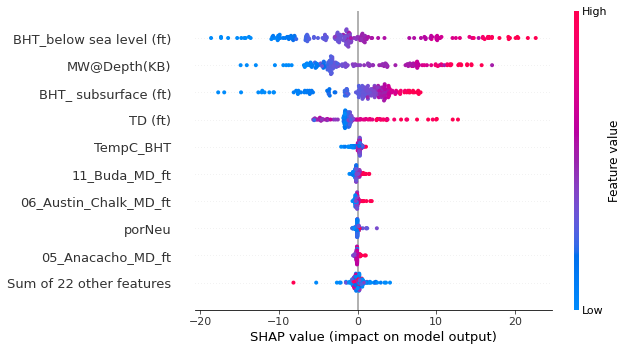

In [ ]:
shap.plots.beeswarm(shap_values)

## Model building and hyper-parameter tuning

In [ ]:
## all the parameter cases
batch_size = [20, 40, 60, 80, 10,100]
epochs = [100, 250, 500, 1000, 1500,2000,2500]
neurons = [ 3,5, 10, 15, 20, 25, 30, 40]
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
optimizer = ['RMSprop','Adam', 'Adamax', 'Nadam'] #'Adagrad', 'Adadelta',
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [ ]:
neurons=3
my_init = initializers.random_normal(seed=1)

model = Sequential()
model.add(Dense(neurons, input_dim=31,kernel_initializer=my_init, activation='relu'))
model.add(Dense(neurons,kernel_initializer=my_init, activation='relu'))
model.add(Dense(neurons,kernel_initializer=my_init, activation='relu'))
model.add(Dense(1, kernel_initializer=my_init,activation='relu'))
# Compile model
model.compile(loss='mae', optimizer='RMSprop', metrics=['mae'])
#X=np.asarray(X_trainf)
#Y=np.asarray(y_train)
#print(X.shape)
# fit the model
model.fit(X_trainf,y_train, epochs=3000, batch_size=10, verbose=0)

prediction = model.predict(X_testf)
mae = mean_absolute_error(y_test,prediction)

print('Test_mae:', mae)

Test_mae: 111.8794272413479


## Predictions

In [ ]:
#eagle_Pred['temp_measured']=df[df.Set == 'Validation_Testing'].TempC_BHT
#eagle_Pred['prediction'] = ypred
#eagle_Pred['TrueTemp'] = eagle_Pred['prediction']+eagle_Pred['temp_measured']
#eagle_Pred.drop(columns =['temp_measured','prediction'],inplace=True)
scaled_noT=scaled[scaled.Set == 'Validation_Testing']
#Data preparation

test_set_eagle=scaled_noT.drop(['UWI','Target','Set'],axis=1)
print(test_set_eagle.shape)
ypred=model.predict(test_set_eagle)
eagle_Pred = pd.DataFrame()
eagle_Pred['UWI'] = df[df.Set == 'Validation_Testing'].UWI

eagle_Pred['TrueTemp'] = ypred

eagle_Pred

(79, 31)


,UWI,TrueTemp
2,42507312420000,0.0
4,42493322270000,0.0
11,42493311680000,0.0
12,42493311060000,0.0
17,42493306840000,0.0
20,42479352780000,0.0
26,42395304830000,0.0
39,42323312460000,0.0
40,42323307960000,0.0
43,42323300710000,0.0


,UWI
2,42507312420000
4,42493322270000
11,42493311680000
12,42493311060000
17,42493306840000


In [ ]:
scaled_noT=scaled[scaled.Set == 'Validation_Testing']
test_set_eagle=scaled_noT.drop(['UWI','Target','Set'],axis=1)
#Data preparation

test_set_eagle=scaled_noT.drop(['UWI','Target','Set'],axis=1)
print(test_set_eagle.shape)

a=3
for m in batch_size:
    for k in epochs:
        for i in neurons:
            for j in optimizer:
                my_init = initializers.random_normal

                model = Sequential()
                model.add(Dense(i, input_dim=31,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(i,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(i,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(1, kernel_initializer=my_init,activation='relu'))
                model.compile(loss='mae', optimizer=j, metrics=['mae'])

                model.fit(X_trainf,y_train, epochs=k, batch_size=m, verbose=0)
    
                prediction = model.predict(X_testf)
                mae = mean_absolute_error(y_test,prediction)
                print(m,i,j,k, mae,a)
                if mae < a:
                    a=mae
                    ypred=model.predict(test_set_eagle)
                

                
            

(79, 31)
20 3 RMSprop 100 34.188060295025565 3
20 3 Adam 100 23.85893749394077 3
20 3 Adamax 100 95.01562114236138 3
20 3 Nadam 100 25.707795067143575 3
20 5 RMSprop 100 109.12344010672675 3
20 5 Adam 100 18.530648283824586 3
20 5 Adamax 100 31.300873900371293 3
20 5 Nadam 100 21.253229897497 3
20 10 RMSprop 100 9.688700399268143 3
20 10 Adam 100 9.190091959590672 3
20 10 Adamax 100 19.86834345198465 3
20 10 Nadam 100 10.369166789425392 3
20 15 RMSprop 100 7.758373574335261 3
20 15 Adam 100 8.525086961306254 3
20 15 Adamax 100 19.203892553943092 3
20 15 Nadam 100 8.038218863044419 3
20 20 RMSprop 100 8.284459033268359 3
20 20 Adam 100 8.161630432267454 3
20 20 Adamax 100 13.08227262750226 3
20 20 Nadam 100 109.12344010672675 3
20 25 RMSprop 100 8.402776114387558 3
20 25 Adam 100 7.630036426762927 3
20 25 Adamax 100 12.900613549906602 3
20 25 Nadam 100 7.390600778345953 3
20 30 RMSprop 100 6.52509337183055 3
20 30 Adam 100 8.221920771740253 3
20 30 Adamax 100 109.12344010672675 3
20 30 

20 20 Adamax 1500 6.465399371494765 2.439233645832575
20 20 Nadam 1500 8.024430986880903 2.439233645832575
20 25 RMSprop 1500 8.10689361384505 2.439233645832575
20 25 Adam 1500 7.099732852008971 2.439233645832575
20 25 Adamax 1500 6.783620143536342 2.439233645832575
20 25 Nadam 1500 7.2370544341501954 2.439233645832575
20 30 RMSprop 1500 7.2802024497195 2.439233645832575
20 30 Adam 1500 7.273460255254528 2.439233645832575
20 30 Adamax 1500 7.3336745276018265 2.439233645832575
20 30 Nadam 1500 8.114533272546721 2.439233645832575
20 40 RMSprop 1500 9.234571247227944 2.439233645832575
20 40 Adam 1500 8.636918337665554 2.439233645832575
20 40 Adamax 1500 7.8736962349476 2.439233645832575
20 40 Nadam 1500 8.206774485317071 2.439233645832575
20 3 RMSprop 2000 109.12344010672675 2.439233645832575
20 3 Adam 2000 109.12344010672675 2.439233645832575
20 3 Adamax 2000 109.12344010672675 2.439233645832575
20 3 Nadam 2000 5.079280603495805 2.439233645832575
20 5 RMSprop 2000 109.12344010672675 2.43

40 15 Adam 500 5.452808648142018 2.439233645832575
40 15 Adamax 500 109.12344010672675 2.439233645832575
40 15 Nadam 500 5.210591503476603 2.439233645832575
40 20 RMSprop 500 6.538779676237987 2.439233645832575
40 20 Adam 500 8.814708139185797 2.439233645832575
40 20 Adamax 500 6.5844989673064 2.439233645832575
40 20 Nadam 500 8.029464185515332 2.439233645832575
40 25 RMSprop 500 8.331913014959994 2.439233645832575
40 25 Adam 500 7.492249799803963 2.439233645832575
40 25 Adamax 500 6.806282098398943 2.439233645832575
40 25 Nadam 500 6.97984734149846 2.439233645832575
40 30 RMSprop 500 6.679874843976508 2.439233645832575
40 30 Adam 500 7.709073728224545 2.439233645832575
40 30 Adamax 500 6.696931035910649 2.439233645832575
40 30 Nadam 500 7.659441595634192 2.439233645832575
40 40 RMSprop 500 8.397061175510725 2.439233645832575
40 40 Adam 500 8.112016113053244 2.439233645832575
40 40 Adamax 500 6.839833646162525 2.439233645832575
40 40 Nadam 500 8.094666340642897 2.439233645832575
40 3 R

KeyboardInterrupt: 

In [ ]:
eagle_Pred = pd.DataFrame()
eagle_Pred['UWI'] = df[df.Set == 'Validation_Testing'].UWI
eagle_Pred['TrueTemp'] = ypred
eagle_Pred

NameError: name 'ypred' is not defined

# Duvernay

In [ ]:
dvnCombined = pd.read_csv('dvnCombined.csv')
dropCols = dvnCombined.columns[(
    dvnCombined.isna().sum() / dvnCombined.shape[0]) > 0.5]

dvnCombined = dvnCombined.drop(dropCols, axis=1)
dvnCombined = dvnCombined.dropna(how='all', axis=1)
dvnCombined = dvnCombined.drop(['Play_'], axis=1)
dropCols = dvnCombined.columns[dvnCombined.nunique() < 10]
dvnCombined = dvnCombined.drop(set(dropCols) - set(['Set_']), axis=1)

dvnCombined.drop(columns =['Formation DSTd_Pres','Formation DSTd','DST Number','DST Number_Pres','07_Ostracod_Beds (Surbiton)[SSTVD] (m)_FT','02_Lea_Park (Surbiton)[SSTVD] (m)_FT','2nd Shut-in Time_Pres','1st Shut-in Time_Pres',
       '08_Jurassic_Top (Surbiton)[SSTVD] (m)_FT','1st Flow Pressure (kPa)_Pres', '2nd Flow Pressure (kPa)_Pres','Pressure Recorder Depth (m)_Pres','SurfaceLatitude_NAD27_WH', 'SurfaceLongitude_NAD27_WH',
       'BottomLatitude_NAD27_WH', 'BottomLongitude_NAD27_WH', 'Elevation Ground (m)_Prod','Elevation Kelly Bushing (m)_Prod', 'Elevation Meters_WH','BottomLatitude_NAD83_WH', 'BottomLongitude_NAD83_WH','03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)_FT',
       '04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)_FT','2nd Shut-in Pressure (kPa)_Pres'],inplace=True)
dvnCombined['Spud Date_Prod'] = (pd.to_datetime(
    dvnCombined['Spud Date_Prod']) - pd.to_datetime('today')).dt.days
dvnCombined['Elevation_Prod'] = dvnCombined['Elevation_Prod'].apply(
    lambda x: float(x.split()[0]))*0.3048
dvnCombined.drop(columns =['DST Test Date','Spud Date_Prod','DST Test Date_Pres', '1st Valve Open Time_Pres',
       '2nd Valve Open Time_Pres','1st Shut-in Initial Slope_Pres','elevation M above sea level',
       '1st Shut-in Final Slope_Pres', '2nd Shut-in Initial Slope_Pres',
       '2nd Shut-in Final Slope_Pres','Spud Date_Prod','Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)_FT',
       'Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)_FT', 'SurfaceLatitude_NAD83_WH','Elevation(m above sea level)_FT'],inplace=True)
dvnCombined.isna().sum()

UWI                                            0
DST Start Depth (MD) (m)                       0
DST End Depth (MD) (m)                         0
DST Bottom Hole Temp. (degC)                   0
Depths subsea (m)                              0
KB Elev (m)_Pres                              28
DST Start Depth (MD) (m)_Pres                 28
DST End Depth (MD) (m)_Pres                   28
DST Bottom Hole Temp. (degC)_Pres            124
Initial Hydrostatic Pressure (kPa)_Pres       54
Final Hydrostatic Pressure (kPa)_Pres         57
1st Shut-in Pressure (kPa)_Pres               42
Maximum Shut-in Pressure (kPa)_Pres           39
Measured Depth (m)_Prod                        0
Total Vertical Depth (m)_Prod                  0
Elevation_Prod                                 0
TD meters_WH                                   0
SurfaceLongitude_NAD83_WH                      0
05_Fish_scales (Surbiton)[SSTVD] (m)_FT        9
06_Mannville_Top (Surbiton)[SSTVD] (m)_FT      8
11_Wabamun (Surbiton

In [ ]:
cols=dvnCombined.columns[(dvnCombined.isna().sum()>0)]
cols=cols.delete(-1)
for a in cols:
    dvnCombined[a].fillna((dvnCombined[a].median()), inplace=True)

## Feature Importance

Feature DST Start Depth (MD) (m): 2088.621594
Feature DST End Depth (MD) (m): 2052.561411
Feature DST Bottom Hole Temp. (degC): 489.124155
Feature Depths subsea (m): 1469.329793
Feature KB Elev (m)_Pres: 93.488643
Feature DST Start Depth (MD) (m)_Pres: 532.586694
Feature DST End Depth (MD) (m)_Pres: 526.935449
Feature DST Bottom Hole Temp. (degC)_Pres: 228.216686
Feature Initial Hydrostatic Pressure (kPa)_Pres: 176.601404
Feature Final Hydrostatic Pressure (kPa)_Pres: 447.107409
Feature 1st Shut-in Pressure (kPa)_Pres: 147.797641
Feature Maximum Shut-in Pressure (kPa)_Pres: 168.712243
Feature Measured Depth (m)_Prod: 133.256565
Feature Total Vertical Depth (m)_Prod: 133.217941
Feature Elevation_Prod: 103.076753
Feature TD meters_WH: 14.022795
Feature SurfaceLongitude_NAD83_WH: 72.350600
Feature 05_Fish_scales (Surbiton)[SSTVD] (m)_FT: 92.337365
Feature 06_Mannville_Top (Surbiton)[SSTVD] (m)_FT: 87.885376
Feature 11_Wabamun (Surbiton)[SSTVD] (m)_FT: 84.834822
Feature 12_Winterburn (Surb

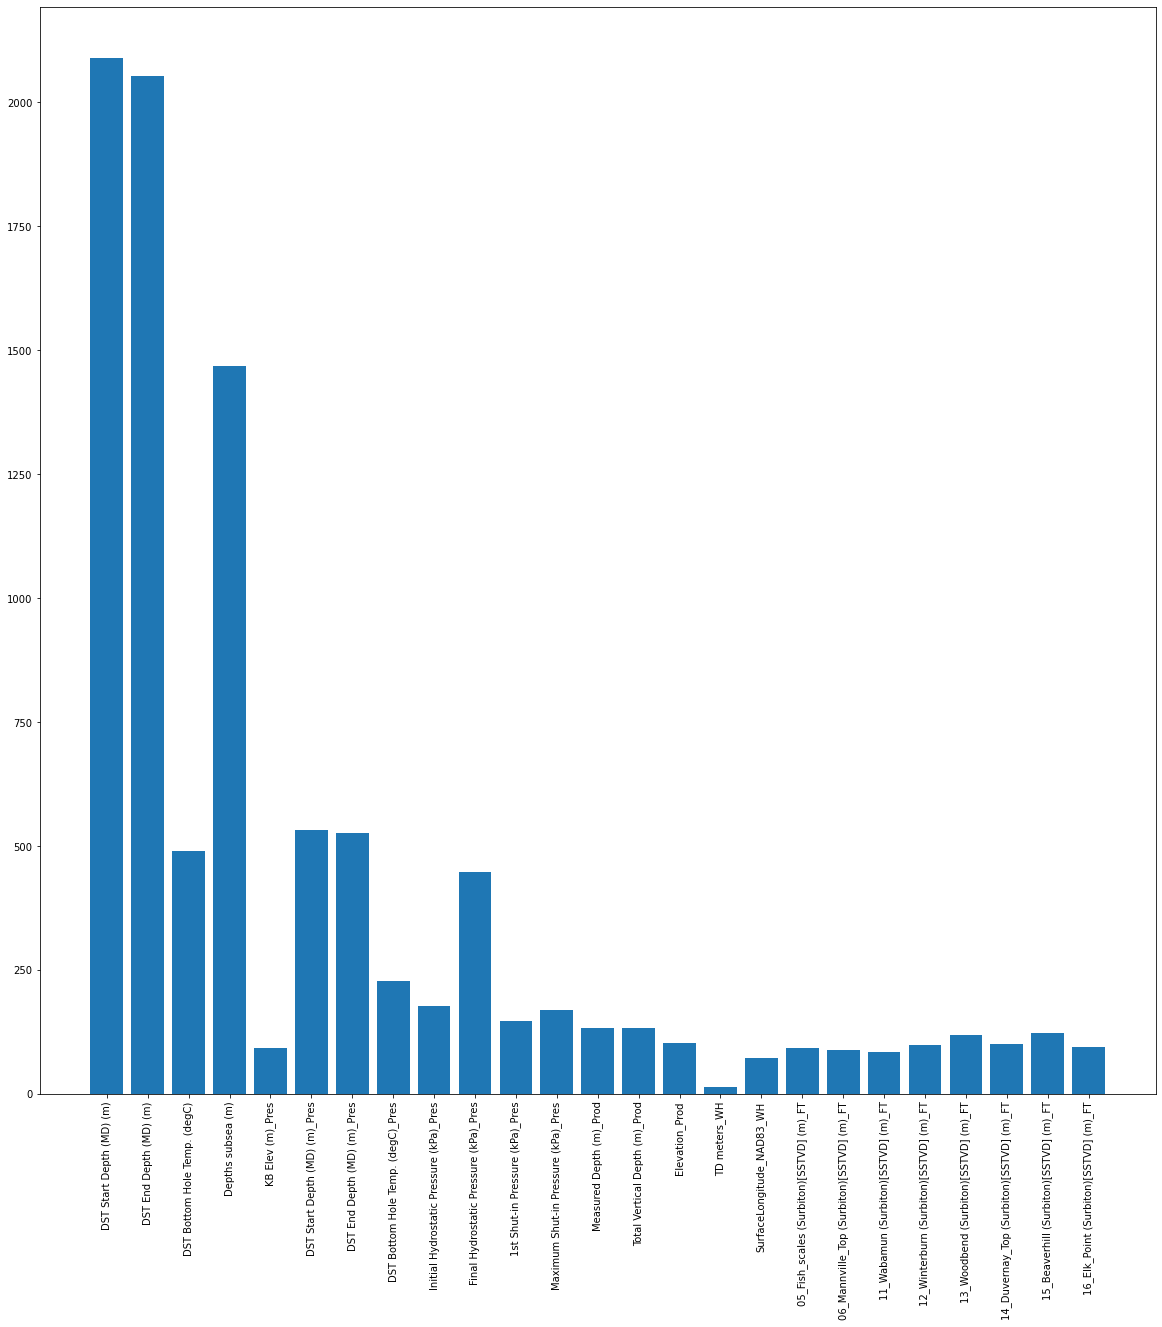

In [ ]:
dvn_train=dvnCombined.dropna(subset=['target'])
y_dvn=dvn_train['target']
x_dvn=dvn_train.drop(columns =['target','Set_','UWI'])
from sklearn.feature_selection import SelectKBest, chi2, f_regression
fs=SelectKBest(score_func=f_regression,k=5)
fs.fit(x_dvn,y_dvn)

for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x_dvn.columns[i], fs.scores_[i]))
# plot the scores
plt.figure(figsize=(20,20))
plt.bar([x_dvn.columns[i] for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(rotation=90)
plt.show()

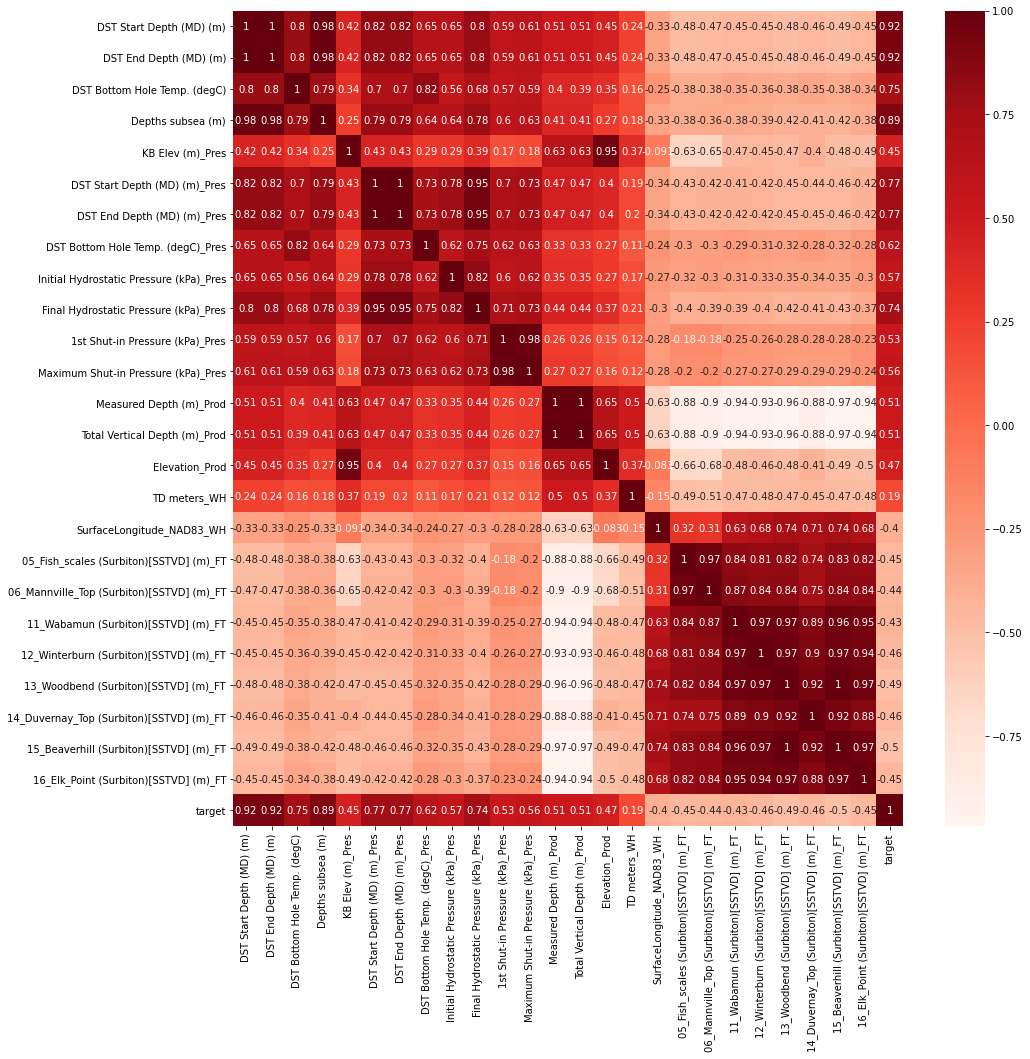

In [ ]:
cor = dvnCombined.drop(columns =['UWI','Set_']).corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [ ]:
dvnCombined.columns

Index(['UWI', 'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'Depths subsea (m)', 'KB Elev (m)_Pres',
       'DST Start Depth (MD) (m)_Pres', 'DST End Depth (MD) (m)_Pres',
       'DST Bottom Hole Temp. (degC)_Pres',
       'Initial Hydrostatic Pressure (kPa)_Pres',
       'Final Hydrostatic Pressure (kPa)_Pres',
       '1st Shut-in Pressure (kPa)_Pres',
       'Maximum Shut-in Pressure (kPa)_Pres', 'Measured Depth (m)_Prod',
       'Total Vertical Depth (m)_Prod', 'Elevation_Prod', 'TD meters_WH',
       'SurfaceLongitude_NAD83_WH', '05_Fish_scales (Surbiton)[SSTVD] (m)_FT',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)_FT',
       '11_Wabamun (Surbiton)[SSTVD] (m)_FT',
       '12_Winterburn (Surbiton)[SSTVD] (m)_FT',
       '13_Woodbend (Surbiton)[SSTVD] (m)_FT',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)_FT',
       '15_Beaverhill (Surbiton)[SSTVD] (m)_FT',
       '16_Elk_Point (Surbiton)[SSTVD] (m)_FT', 'Set_', 'target'],
      dtyp

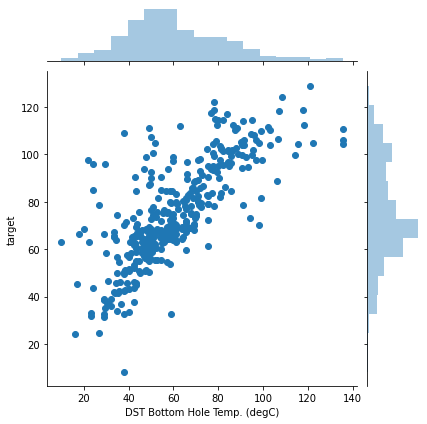

In [ ]:
sns.jointplot(x='DST Bottom Hole Temp. (degC)',y='target',data=dvnCombined,kind='scatter')

In [ ]:
dvnCombined.columns

Index(['UWI', 'DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'Depths subsea (m)', 'KB Elev (m)_Pres',
       'DST Start Depth (MD) (m)_Pres', 'DST End Depth (MD) (m)_Pres',
       'DST Bottom Hole Temp. (degC)_Pres',
       'Initial Hydrostatic Pressure (kPa)_Pres',
       'Final Hydrostatic Pressure (kPa)_Pres',
       '1st Shut-in Pressure (kPa)_Pres',
       'Maximum Shut-in Pressure (kPa)_Pres', 'Measured Depth (m)_Prod',
       'Total Vertical Depth (m)_Prod', 'Elevation_Prod', 'TD meters_WH',
       'SurfaceLongitude_NAD83_WH', '05_Fish_scales (Surbiton)[SSTVD] (m)_FT',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)_FT',
       '11_Wabamun (Surbiton)[SSTVD] (m)_FT',
       '12_Winterburn (Surbiton)[SSTVD] (m)_FT',
       '13_Woodbend (Surbiton)[SSTVD] (m)_FT',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)_FT',
       '15_Beaverhill (Surbiton)[SSTVD] (m)_FT',
       '16_Elk_Point (Surbiton)[SSTVD] (m)_FT', 'Set_', 'target'],
      dtyp

## Duvernay data standardization

In [ ]:
scaler = StandardScaler()
datadvn=dvnCombined[['DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'Depths subsea (m)', 'KB Elev (m)_Pres',
       'DST Start Depth (MD) (m)_Pres', 'DST End Depth (MD) (m)_Pres',
       'DST Bottom Hole Temp. (degC)_Pres',
       'Initial Hydrostatic Pressure (kPa)_Pres',
       'Final Hydrostatic Pressure (kPa)_Pres',
       '1st Shut-in Pressure (kPa)_Pres',
       'Maximum Shut-in Pressure (kPa)_Pres', 'Measured Depth (m)_Prod',
       'Total Vertical Depth (m)_Prod', 'Elevation_Prod', 'TD meters_WH',
       'SurfaceLongitude_NAD83_WH', '05_Fish_scales (Surbiton)[SSTVD] (m)_FT',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)_FT',
       '11_Wabamun (Surbiton)[SSTVD] (m)_FT',
       '12_Winterburn (Surbiton)[SSTVD] (m)_FT',
       '13_Woodbend (Surbiton)[SSTVD] (m)_FT',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)_FT',
       '15_Beaverhill (Surbiton)[SSTVD] (m)_FT',
       '16_Elk_Point (Surbiton)[SSTVD] (m)_FT']].values
scaler.fit(datadvn)
datadvn_scaled=scaler.transform(datadvn)
scaleddvn=pd.DataFrame(datadvn_scaled,columns=['DST Start Depth (MD) (m)', 'DST End Depth (MD) (m)',
       'DST Bottom Hole Temp. (degC)', 'Depths subsea (m)', 'KB Elev (m)_Pres',
       'DST Start Depth (MD) (m)_Pres', 'DST End Depth (MD) (m)_Pres',
       'DST Bottom Hole Temp. (degC)_Pres',
       'Initial Hydrostatic Pressure (kPa)_Pres',
       'Final Hydrostatic Pressure (kPa)_Pres',
       '1st Shut-in Pressure (kPa)_Pres',
       'Maximum Shut-in Pressure (kPa)_Pres', 'Measured Depth (m)_Prod',
       'Total Vertical Depth (m)_Prod', 'Elevation_Prod', 'TD meters_WH',
       'SurfaceLongitude_NAD83_WH', '05_Fish_scales (Surbiton)[SSTVD] (m)_FT',
       '06_Mannville_Top (Surbiton)[SSTVD] (m)_FT',
       '11_Wabamun (Surbiton)[SSTVD] (m)_FT',
       '12_Winterburn (Surbiton)[SSTVD] (m)_FT',
       '13_Woodbend (Surbiton)[SSTVD] (m)_FT',
       '14_Duvernay_Top (Surbiton)[SSTVD] (m)_FT',
       '15_Beaverhill (Surbiton)[SSTVD] (m)_FT',
       '16_Elk_Point (Surbiton)[SSTVD] (m)_FT' ])
scaleddvn['UWI']=dvnCombined['UWI']
scaleddvn['Set_']=dvnCombined['Set_']

scaleddvn['target']=dvnCombined['target']
scaleddvn['bias']=1
scaleddvn.head()

,DST Start Depth (MD) (m),DST End Depth (MD) (m),DST Bottom Hole Temp. (degC),Depths subsea (m),KB Elev (m)_Pres,DST Start Depth (MD) (m)_Pres,DST End Depth (MD) (m)_Pres,DST Bottom Hole Temp. (degC)_Pres,Initial Hydrostatic Pressure (kPa)_Pres,Final Hydrostatic Pressure (kPa)_Pres,1st Shut-in Pressure (kPa)_Pres,Maximum Shut-in Pressure (kPa)_Pres,Measured Depth (m)_Prod,Total Vertical Depth (m)_Prod,Elevation_Prod,TD meters_WH,SurfaceLongitude_NAD83_WH,05_Fish_scales (Surbiton)[SSTVD] (m)_FT,06_Mannville_Top (Surbiton)[SSTVD] (m)_FT,11_Wabamun (Surbiton)[SSTVD] (m)_FT,12_Winterburn (Surbiton)[SSTVD] (m)_FT,13_Woodbend (Surbiton)[SSTVD] (m)_FT,14_Duvernay_Top (Surbiton)[SSTVD] (m)_FT,15_Beaverhill (Surbiton)[SSTVD] (m)_FT,16_Elk_Point (Surbiton)[SSTVD] (m)_FT,UWI,Set_,target,bias
0,-0.778485,-0.783460,-0.546472,-0.614159,-1.066005,-0.623186,-0.626691,-0.600944,-0.572844,-0.613432,0.087983,0.044519,-0.309008,-0.308731,-1.053036,-0.304352,-0.666879,0.740363,0.651510,0.056759,0.008056,0.069201,0.023848,-0.013693,0.034451,100010107020W500,Training,60.97,1
1,-0.384925,-0.399578,-1.171487,-0.110040,-1.478892,-0.206843,-0.221058,-1.324018,-0.231439,-0.312820,-0.179410,-0.217991,-1.834133,-1.833849,-1.452925,-1.020677,0.460930,2.031324,2.012157,1.820513,1.696142,1.615854,1.801278,1.662309,1.760577,100010608109W500,Training,63.98,1
2,-1.619622,-1.632371,-1.405147,-1.449394,-1.434175,-1.825957,-1.827999,-0.087031,-1.621483,-1.862302,-0.883066,-0.908806,-2.211324,-2.211038,-1.409458,-1.197469,2.240886,1.392145,1.369228,-0.058869,2.215794,2.169799,2.507676,2.170627,2.158768,100011206021W400,Training,39.07,1
3,-0.220584,-0.223667,0.149619,-0.275828,0.216630,-0.032988,-0.035180,0.204357,-0.038185,-0.014584,0.206732,0.161104,-0.395353,-0.395076,0.157497,-0.344750,-0.133614,0.919939,0.846965,0.638714,0.574814,0.572281,0.600568,0.525350,0.550325,100011506915W500,Training,69.47,1
4,0.073799,0.060060,0.327306,-0.077497,0.766650,0.171102,0.158192,0.461313,0.048784,0.047213,-1.176373,-1.103347,-0.273107,-0.272830,0.694305,-0.287314,1.187658,-0.482045,-0.508654,0.140085,0.112151,0.217620,0.254738,0.174675,-0.074935,100011804403W500,Training,75.23,1


In [ ]:
scaleddvn_withT=scaleddvn[scaleddvn.Set_== 'Training']
#Data preparation

ydvn=scaleddvn_withT['target'].to_numpy()
xdvn=scaleddvn_withT.drop(['target','Set_'],axis=1)

# split data into train and test sets
test_size = 0.25
Xdvn_train, Xdvn_test, ydvn_train, ydvn_test = train_test_split(xdvn, ydvn, test_size=test_size, random_state=101)
Xdvn_trainf=Xdvn_train.drop(['UWI'],axis=1)
Xdvn_testf=Xdvn_test.drop(['UWI'],axis=1)
print(Xdvn_trainf.shape)

(279, 26)


In [ ]:
Xdvn_trainf.isna().sum()

DST Start Depth (MD) (m)                     0
DST End Depth (MD) (m)                       0
DST Bottom Hole Temp. (degC)                 0
Depths subsea (m)                            0
KB Elev (m)_Pres                             0
DST Start Depth (MD) (m)_Pres                0
DST End Depth (MD) (m)_Pres                  0
DST Bottom Hole Temp. (degC)_Pres            0
Initial Hydrostatic Pressure (kPa)_Pres      0
Final Hydrostatic Pressure (kPa)_Pres        0
1st Shut-in Pressure (kPa)_Pres              0
Maximum Shut-in Pressure (kPa)_Pres          0
Measured Depth (m)_Prod                      0
Total Vertical Depth (m)_Prod                0
Elevation_Prod                               0
TD meters_WH                                 0
SurfaceLongitude_NAD83_WH                    0
05_Fish_scales (Surbiton)[SSTVD] (m)_FT      0
06_Mannville_Top (Surbiton)[SSTVD] (m)_FT    0
11_Wabamun (Surbiton)[SSTVD] (m)_FT          0
12_Winterburn (Surbiton)[SSTVD] (m)_FT       0
13_Woodbend (

## Model Building and Hyper-parameter tuning

In [ ]:
a=4
for m in batch_size:
    for k in epochs:
        for i in neurons:
            for j in optimizer:
                my_init = initializers.random_normal

                model = Sequential()
                model.add(Dense(i, input_dim=26,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(i,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(i,kernel_initializer=my_init, activation='relu'))
                model.add(Dense(1, kernel_initializer=my_init,activation='relu'))
                model.compile(loss='mae', optimizer=j, metrics=['mae'])

                model.fit(Xdvn_trainf,ydvn_train, epochs=k, batch_size=m, verbose=0)

                prediction = model.predict(Xdvn_testf)
                mae = mean_absolute_error(ydvn_test,prediction)

                print(a,m,i,j,k, mae)
                if mae<a:
                    a=mae
                    scaled_noTdvn=scaleddvn[scaleddvn.Set_ == 'Validation_Testing']
                    test_set_dvn=scaled_noTdvn.drop(['UWI','target','Set_'],axis=1)
                    ypreddvn=model.predict(test_set_dvn)
                

4 20 3 RMSprop 100 31.75808661931756
4 20 3 Adam 100 27.928026593210262
4 20 3 Adamax 100 75.1353405016129
4 20 3 Nadam 100 17.40803466642226
4 20 5 RMSprop 100 75.1353405016129
4 20 5 Adam 100 75.1353405016129
4 20 5 Adamax 100 26.973357174054936
4 20 5 Nadam 100 5.792165939261225
4 20 10 RMSprop 100 3.8825759699953797
3.8825759699953797 20 10 Adam 100 3.775601712392893
3.775601712392893 20 10 Adamax 100 14.111279694846273
3.775601712392893 20 10 Nadam 100 3.8367731936176916
3.775601712392893 20 15 RMSprop 100 3.667240969024068
3.667240969024068 20 15 Adam 100 3.823544735746388
3.667240969024068 20 15 Adamax 100 7.353922234906334
3.667240969024068 20 15 Nadam 100 3.7643888880533853
3.667240969024068 20 20 RMSprop 100 3.7868727186591693
3.667240969024068 20 20 Adam 100 3.6634749686250427
3.6634749686250427 20 20 Adamax 100 4.51987099195491
3.6634749686250427 20 20 Nadam 100 3.747226315664377
3.6634749686250427 20 25 RMSprop 100 4.037359441215663
3.6634749686250427 20 25 Adam 100 75.135

KeyboardInterrupt: 

In [ ]:

my_init = initializers.random_normal

model = Sequential()
model.add(Dense(5, input_dim=31,kernel_initializer=my_init, activation='relu'))
model.add(Dense(5,kernel_initializer=my_init, activation='relu'))
model.add(Dense(5,kernel_initializer=my_init, activation='relu'))
model.add(Dense(1, kernel_initializer=my_init,activation='relu'))
model.compile(loss='mae', optimizer="Adam", metrics=['mae'])

model.fit(Xdvn_trainf,ydvn_train, epochs=2000, batch_size=10, verbose=0)

prediction = model.predict(Xdvn_testf)
mae = mean_absolute_error(ydvn_test,prediction)

print(mae)

2.6666611908245126


In [ ]:
scaled_noTdvn=scaleddvn[scaleddvn.Set_ == 'Validation_Testing']
#Data preparation

test_set_dvn=scaled_noTdvn.drop(['UWI','target','Set_'],axis=1)
print(test_set_dvn.shape)


(127, 26)


## Predictions

In [ ]:
#ypreddvn=model.predict(test_set_dvn)
dvn_Pred = pd.DataFrame()
dvn_Pred['UWI'] = dvnCombined[dvnCombined.Set_ == 'Validation_Testing'].UWI
#dvn_Pred['temp_measured'] = dvnCombined[dvnCombined.Set_ == 'Validation_Testing'].DST Bottom Hole Temp. (degC)
dvn_Pred['TrueTemp'] = ypreddvn
#dvn_Pred['TrueTemp'] = dvn_Pred['prediction']+dvn_Pred['temp_measured']
#dvn_Pred.drop(columns =['temp_measured','prediction'],inplace=True)
dvn_Pred


,UWI,TrueTemp
7,100012404516W502,0
9,100012805703W500,0
14,100020206419W500,0
17,100020605904W500,0
18,100020606216W500,0
25,100021503426W400,0
28,100021506718W500,0
32,100021806318W500,0
34,100022005123W400,0
42,100022706625W500,0


In [ ]:
predictions = dvn_Pred.append(eagle_Pred)
predictions = predictions.reset_index(drop=True)

In [ ]:
predictions.to_csv('predictions-ali2.csv')


In [ ]:
predictions.to_csv('predictions.csv')
import zipfile
zipfile.ZipFile('predictions.zip', mode='w').write('predictions.csv')